<a href="https://colab.research.google.com/github/prabirdeb/World-Bank-Global-Education-Analysis/blob/main/World_Bank_Global_Education_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

# **Steps of Exploratory Data Analysis (EDA)**

### **1. Connection with the Data**

The World Bank Group is the largest financier of education in the developing world. 

Here, we are provided with 5 datasets about global education statistics.

The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.

Now, we need to **decode the set of experiences** to identify variation of indicators across the globe, which countries are more alike and different.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib 
from sklearn.preprocessing import LabelEncoder

Using matplotlib backend: agg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading the data as pandas dataframe
country_series_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsCountry-Series.csv')
country_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsCountry.csv')
data_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsData.csv')
footnote_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsFootNote.csv')
series_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsSeries.csv')

In [4]:
list_of_df=[country_series_df,country_df,data_df,footnote_df,series_df]

### **2. First Feelings of the Data**

Here, the columns are the set of features, showing the way to reach final decoded experience or conclusions.  

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [5]:
country_series_df.head(2)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [6]:
country_df.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [7]:
data_df.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
footnote_df.head(2)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN


In [9]:
series_df.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
series_df["Indicator Name"].values[0]

'Barro-Lee: Percentage of female population age 15-19 with no education'

In [11]:
series_df["Short definition"].values[0]

'Percentage of female population age 15-19 with no education'

In [12]:
series_df["Long definition"].values[0]

'Percentage of female population age 15-19 with no education'

### **3. Deeper Understanding of the Data**

As there is a huge no. of experiences and huge no. of features, we take the help of **statistics to measure** each and every features and thus step by step, we find the most important experiences and features.

“**what gets measured gets done**“.

In [13]:
# Checking overall information
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

**Here, the data set has 47 years of experiences from 1970 to 2016 with 3,665 statistical indicators (features) for 242 countries**

data_df has 3665*242= 886930 rows 

**Therefore, we will create sub dataframes for all 242 countries and set the years in rows and indicators in column.**

### **4. Cleaning the Data**

Now we can create a clean experience set with important features. 

In this step, we treat the missing values or "?" values through imputation if required.

We may also create new feature if found important during the analysis.

We check the statistics further on clean data.

In [14]:
data_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [15]:
# Now we can break the data_df into record and target indicators data frames
record_df=data_df[['Country Code','Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016']]
target_df=data_df[['Country Code','Indicator Code',
       '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']]

In [16]:
# checking the no. of null values in each column
record_df.isnull().sum()

Country Code           0
Indicator Code         0
1970              814642
1971              851393
1972              851311
1973              851385
1974              851200
1975              799624
1976              849447
1977              849356
1978              849354
1979              850121
1980              797808
1981              848153
1982              849419
1983              848470
1984              848324
1985              796634
1986              847558
1987              848289
1988              848378
1989              849390
1990              762525
1991              812493
1992              811387
1993              811137
1994              809468
1995              755569
1996              810123
1997              813477
1998              802016
1999              768091
2000              710254
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822
2006              746618
2007              749658


In [17]:
# Most of the records have null values. 
# Means we do not have the data of all the indicators for all the countries and years

In [18]:
dict_of_countries=dict(data_df[['Country Code','Country Name']].values)
dict_of_countries.get('ARB')

'Arab World'

In [19]:
dict_of_indicators=dict(data_df[['Indicator Code','Indicator Name']].values)
dict_of_indicators.get('UIS.NERA.2')

'Adjusted net enrolment rate, lower secondary, both sexes (%)'

In [20]:
# Creating filtered record for all individual countries
dict_of_filtered_df={i:record_df.loc[(record_df['Country Code']==i)] for i in list(dict_of_countries.keys())}
for k in list(dict_of_countries.keys()):
  dict_of_filtered_df.get(k).drop(['Country Code'], axis = 1, inplace=True)
  dict_of_filtered_df.get(k).set_index('Indicator Code', inplace=True)
  dict_of_filtered_df.update({k:dict_of_filtered_df.get(k).transpose()})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
dict_of_filtered_df.get('ARB').head(2)

Indicator Code,UIS.NERA.2,UIS.NERA.2.F,UIS.NERA.2.GPI,UIS.NERA.2.M,SE.PRM.TENR,SE.PRM.TENR.FE,UIS.NERA.1.GPI,SE.PRM.TENR.MA,UIS.NERA.3,UIS.NERA.3.F,UIS.NERA.3.GPI,UIS.NERA.3.M,UIS.NIRA.1,UIS.NIRA.1.F,UIS.NIRA.1.GPI,UIS.NIRA.1.M,UIS.LPP.AG15T99,UIS.LP.AG15T99,UIS.LP.AG15T99.F,UIS.LP.AG15T99.M,SE.ADT.LITR.ZS,SE.ADT.LITR.FE.ZS,UIS.LR.AG15T99.GPI,SE.ADT.LITR.MA.ZS,UIS.AFR.AGRADMG.1.PU,UIS.AFR.PBR.1.G1.PU.MATH,UIS.AFR.PBR.1.G2.PU.MATH,UIS.AFR.PBR.1.G3.PU.MATH,UIS.AFR.PBR.1.G4.PU.MATH,UIS.AFR.PBR.1.G5.PU.MATH,UIS.AFR.PBR.1.G6.PU.MATH,UIS.AFR.PBR.1.G7.PU.MATH,UIS.AFR.PBR.1.PU.MATH,UIS.AFR.PBR.1.G1.PU.READ,UIS.AFR.PBR.1.G2.PU.READ,UIS.AFR.PBR.1.G3.PU.READ,UIS.AFR.PBR.1.G4.PU.READ,UIS.AFR.PBR.1.G5.PU.READ,UIS.AFR.PBR.1.G6.PU.READ,UIS.AFR.PBR.1.G7.PU.READ,...,PRJ.POP.2529.2.MA,PRJ.POP.2529.2.MF,PRJ.POP.2529.NED.FE,PRJ.POP.2529.NED.MA,PRJ.POP.2529.NED.MF,PRJ.POP.2529.4.FE,PRJ.POP.2529.4.MA,PRJ.POP.2529.4.MF,PRJ.POP.2529.1.FE,PRJ.POP.2529.1.MA,PRJ.POP.2529.1.MF,PRJ.POP.2529.3.FE,PRJ.POP.2529.3.MA,PRJ.POP.2529.3.MF,PRJ.POP.ALL.S1.FE,PRJ.POP.ALL.S1.MA,PRJ.POP.ALL.S1.MF,PRJ.POP.ALL.2.FE,PRJ.POP.ALL.2.MA,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.NED.FE,PRJ.POP.ALL.NED.MA,PRJ.POP.ALL.NED.MF,PRJ.POP.ALL.4.FE,PRJ.POP.ALL.4.MA,PRJ.POP.ALL.4.MF,PRJ.POP.ALL.1.FE,PRJ.POP.ALL.1.MA,PRJ.POP.ALL.1.MF,PRJ.POP.ALL.3.FE,PRJ.POP.ALL.3.MA,PRJ.POP.ALL.3.MF,UIS.LPP.AG15T24,UIS.LP.AG15T24,UIS.LP.AG15T24.F,UIS.LP.AG15T24.M,SE.ADT.1524.LT.ZS,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS
1970,NaN,NaN,NaN,NaN,54.822121,43.351101,0.65857,65.826233,NaN,NaN,NaN,NaN,52.448921,44.342487,0.73634,60.220436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,NaN,NaN,NaN,54.894138,43.318150,0.65640,65.993584,NaN,NaN,NaN,NaN,52.489750,44.255711,0.73288,60.386391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Checking null values in each of the indicator column for a sample filtered dataframe for a country 
dict_of_filtered_df.get('EMU').isnull().sum()

Indicator Code
UIS.NERA.2              47
UIS.NERA.2.F            47
UIS.NERA.2.GPI          47
UIS.NERA.2.M            47
SE.PRM.TENR              2
                        ..
UIS.LP.AG15T24.M        47
SE.ADT.1524.LT.ZS       47
SE.ADT.1524.LT.FE.ZS    47
SE.ADT.1524.LT.FM.ZS    47
SE.ADT.1524.LT.MA.ZS    47
Length: 3665, dtype: int64

In [23]:
# There are many null values in many of the indicators.
# We will drop the indicators with greater than 50% null values
for k in list(dict_of_filtered_df.keys()):
  new_df=dict_of_filtered_df.get(k)
  for column_name in new_df.columns:
    if new_df[column_name].isnull().sum()>=23:
      new_df.drop([column_name],axis=1,inplace=True)
  dict_of_filtered_df.update({k:new_df})


In [24]:
dict_of_filtered_df.get('EMU').isnull().sum()

Indicator Code
SE.PRM.TENR           2
SE.PRM.TENR.FE        2
UIS.NERA.1.GPI        2
SE.PRM.TENR.MA        2
UIS.NIRA.1            2
                     ..
UIS.NERT.2            7
UIS.NERT.1.GPI        3
SL.UEM.TOTL.FE.ZS    21
SL.UEM.TOTL.MA.ZS    21
SL.UEM.TOTL.ZS       21
Length: 212, dtype: int64

In [25]:
dict_of_filtered_df.get('EMU').describe()

Indicator Code,SE.PRM.TENR,SE.PRM.TENR.FE,UIS.NERA.1.GPI,SE.PRM.TENR.MA,UIS.NIRA.1,UIS.NIRA.1.F,UIS.NIRA.1.GPI,UIS.NIRA.1.M,SE.PRM.DROP.ZS,SE.PRM.DROP.FE.ZS,SE.PRM.DROP.MA.ZS,UIS.ESL.1.T,UIS.ESL.1.F,UIS.ESL.1.M,SE.SEC.PROG.ZS,SE.SEC.PROG.FE.ZS,UIS.TRANRA.23.GPV.GPI,SE.SEC.PROG.MA.ZS,UIS.E.0.PR.T,UIS.E.1.G1,UIS.E.1.G1.F,UIS.E.1.G2,UIS.E.1.G2.F,UIS.E.1.G3,UIS.E.1.G3.F,UIS.E.1.G4,UIS.E.1.G4.F,UIS.E.1.G5,UIS.E.1.G5.F,UIS.E.1.G6,UIS.E.1.G6.F,SE.PRE.ENRL,SE.PRE.ENRL.FE,SE.PRM.ENRL,SE.PRM.ENRL.FE,UIS.E.1.PR,SE.SEC.ENRL,SE.SEC.ENRL.FE,SE.SEC.ENRL.GC,SE.SEC.ENRL.GC.FE,...,UIS.ROFST.1,UIS.ROFST.1.F,UIS.ROFST.1.M,UIS.R.1,UIS.R.1.F,UIS.SLE.0,UIS.SLE.0.F,UIS.SLE.0.GPI,UIS.SLE.0.M,UIS.SLE.123,UIS.SLE.123.F,UIS.SLE.123.GPI,UIS.SLE.123.M,SE.SCH.LIFE,SE.SCH.LIFE.FE,UIS.SLE.1T6.GPI,SE.SCH.LIFE.MA,UIS.SLE.1,UIS.SLE.1.F,UIS.SLE.1.M,UIS.SLE.56,UIS.SLE.56.F,UIS.SLE.56.GPI,UIS.SLE.56.M,SE.PRM.PRSL.ZS,SE.PRM.PRSL.FE.ZS,UIS.SR.1.GLAST.GPI,SE.PRM.PRSL.MA.ZS,SE.PRE.TCHR,SE.PRE.TCHR.FE,SE.PRM.TCHR,SE.PRM.TCHR.FE,SE.SEC.TCHR,SE.SEC.TCHR.FE,SE.TER.TCHR,UIS.NERT.2,UIS.NERT.1.GPI,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,44.000000,44.000000,44.000000,4.500000e+01,4.500000e+01,4.500000e+01,39.000000,35.000000,35.000000,37.000000,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,45.000000,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01,...,45.000000,45.000000,45.000000,4.500000e+01,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,44.000000,44.000000,44.000000,44.000000,45.000000,43.000000,4.500000e+01,4.500000e+01,4.500000e+01,3.900000e+01,3.300000e+01,40.000000,44.000000,26.000000,26.000000,26.000000
mean,97.490471,97.638287,1.003013,97.349690,95.254947,95.931057,1.013646,94.642199,6.489102,5.566617,7.359618,3.781674e+05,1.670289e+05,2.111385e+05,96.953036,97.466403,1.004777,96.815647,3.559950e+06,4.119652e+06,1.992988e+06,4.155508e+06,2.015115e+06,4.105460e+06,1.997461e+06,4.137413e+06,2.014592e+06,2.895374e+06,1.410342e+06,9.714129e+05,472283.644444,9.763489e+06,4.752227e+06,2.059161e+07,1.001202e+07,3.278660e+06,2.981286e+07,1.451714e+07,2.155168e+07,1.084630e+07,...,2.509530,2.361713,2.650310,8.810099e+05,480850.738889,2.611240,2.609081,0.99928,2.613277,12.337096,12.307861,0.995228,12.365751,14.510242,14.533987,0.999990,14.501390,5.201701,5.187327,5.215383,2.026176,2.059921,0.981385,1.995833,93.510899,94.433384,1.019384,92.640382,572453.988889,540887.705669,1.234976e+06,9.712187e+05,2.337294e+06,1.358053e+06,8.037396e+05,96.666636,1.004189,11.305444,9.039103,9.996547
std,1.370463,1.227734,0.003837,1.515740,1.571296,1.516508,0.002975,1.624169,2.528950,2.504405,2.555960,7.641677e+05,3.760701e+05,3.881327e+05,1.377587,1.127226,0.005006,1.349430,3.955621e+05,7.505579e+05,3.604522e+05,6.536223e+05,3.189669e+05,6.445480e+05,3.164340e+05,6.456117e+05,3.191127e+05,4.071905e+05,2.009214e+05,1.909592e+05,90119.539650,3.163661e+05,1.556872e+05,2.763136e+06,1.375644e+06,5.826283e+05,1.750051e+06,9.467656e+05,1.126012e+06,5.825318e+05,...,1.370464,1.227734,1.515741,4.857549e+05,167749.475401,0.335919,0.326923,0.00824,0.344574,0.764138,0.778051,0.011177,0.755913,1.563793,1.743580,0.026862,1.389212,0.118275,0.113709,0.124303,0.776349,0.951353,0.178695,0.610933,2.528950,2.504406,0.001864,2.555960,109081.863909,103382.672255,8.713032e+04,1.149118e+05,2.130677e+05,1.403821e+05,1.629784e+05,1.053924,0.003343,1.703029,1.508504,1.383525
min,95.223793,95.724380,0.996680,94.745872,92.124489,92.992638,1.007540,91.290504,2.854050,2.045860,3.613120,9.660700e+04,3.354000e+04,6.306600e+04,92.072380,94.264931,0.997530,91.807022,3.103795e+06,3.391356e+06,1.641020e+06,3.469

In [26]:
# Imputation with median
for k in list(dict_of_filtered_df.keys()):
  new_df=dict_of_filtered_df.get(k)
  for column_name in new_df.columns:
    new_df[column_name]=new_df[column_name].fillna(new_df[column_name].median())
  dict_of_filtered_df.update({k:new_df})

In [27]:
dict_of_filtered_df.get('EMU').isnull().sum()

Indicator Code
SE.PRM.TENR          0
SE.PRM.TENR.FE       0
UIS.NERA.1.GPI       0
SE.PRM.TENR.MA       0
UIS.NIRA.1           0
                    ..
UIS.NERT.2           0
UIS.NERT.1.GPI       0
SL.UEM.TOTL.FE.ZS    0
SL.UEM.TOTL.MA.ZS    0
SL.UEM.TOTL.ZS       0
Length: 212, dtype: int64

In [28]:
# Checking is there any common indicator among the countries
set_list=[set(dict_of_filtered_df.get(k).columns) for k in list(dict_of_filtered_df.keys())]
set.intersection(*set_list)

set()

In [29]:
# As the intersection of all the column is returning null set, there is no common indicators for all 242 countries

In [30]:
feature_len_list=[len(dict_of_filtered_df.get(k).columns) for k in list(dict_of_filtered_df.keys())]
print(sorted(feature_len_list))
print("Average feature length is:", round(sum(feature_len_list)/len(feature_len_list),0))

[0, 2, 2, 2, 3, 4, 4, 8, 8, 8, 10, 10, 15, 15, 16, 19, 19, 19, 22, 23, 27, 28, 30, 31, 42, 47, 50, 55, 55, 56, 56, 62, 62, 70, 98, 150, 163, 182, 190, 193, 194, 194, 206, 209, 210, 210, 210, 212, 213, 218, 219, 223, 223, 224, 224, 225, 225, 227, 228, 228, 229, 229, 235, 235, 235, 235, 236, 238, 239, 239, 240, 243, 246, 246, 248, 248, 249, 251, 251, 254, 255, 255, 256, 257, 257, 258, 258, 262, 262, 262, 264, 264, 265, 265, 267, 269, 269, 270, 271, 272, 273, 273, 274, 275, 280, 282, 282, 282, 284, 284, 284, 288, 290, 291, 291, 292, 295, 295, 295, 297, 298, 301, 304, 304, 308, 310, 311, 313, 313, 314, 314, 314, 317, 319, 319, 320, 320, 321, 322, 323, 323, 325, 327, 328, 330, 330, 330, 333, 333, 335, 336, 337, 339, 340, 340, 346, 349, 351, 353, 356, 356, 357, 361, 361, 362, 362, 363, 366, 369, 369, 373, 373, 376, 377, 378, 380, 380, 383, 385, 391, 392, 392, 397, 397, 397, 398, 399, 401, 402, 404, 404, 406, 412, 414, 417, 421, 425, 425, 427, 428, 430, 430, 434, 441, 444, 445, 446, 447, 451,

In [31]:
# To find the major countries with most important features, we will delete the countries with less than 100 features
for k in list(dict_of_filtered_df.keys()):
  if len(dict_of_filtered_df.get(k).columns)<100:
    del dict_of_filtered_df[k]

In [32]:
feature_len_list=[len(dict_of_filtered_df.get(k).columns) for k in list(dict_of_filtered_df.keys())]
print(sorted(feature_len_list))
print(len(feature_len_list))

[150, 163, 182, 190, 193, 194, 194, 206, 209, 210, 210, 210, 212, 213, 218, 219, 223, 223, 224, 224, 225, 225, 227, 228, 228, 229, 229, 235, 235, 235, 235, 236, 238, 239, 239, 240, 243, 246, 246, 248, 248, 249, 251, 251, 254, 255, 255, 256, 257, 257, 258, 258, 262, 262, 262, 264, 264, 265, 265, 267, 269, 269, 270, 271, 272, 273, 273, 274, 275, 280, 282, 282, 282, 284, 284, 284, 288, 290, 291, 291, 292, 295, 295, 295, 297, 298, 301, 304, 304, 308, 310, 311, 313, 313, 314, 314, 314, 317, 319, 319, 320, 320, 321, 322, 323, 323, 325, 327, 328, 330, 330, 330, 333, 333, 335, 336, 337, 339, 340, 340, 346, 349, 351, 353, 356, 356, 357, 361, 361, 362, 362, 363, 366, 369, 369, 373, 373, 376, 377, 378, 380, 380, 383, 385, 391, 392, 392, 397, 397, 397, 398, 399, 401, 402, 404, 404, 406, 412, 414, 417, 421, 425, 425, 427, 428, 430, 430, 434, 441, 444, 445, 446, 447, 451, 452, 453, 457, 461, 461, 464, 465, 468, 469, 472, 473, 474, 474, 474, 485, 490, 496, 498, 498, 499, 501, 501, 503, 503, 505, 512,

**Thus, we are selecting 207 countries for the analysis**

In [33]:
# List of selected countries
list_of_countries=[dict_of_countries.get(k) for k in list(dict_of_filtered_df.keys())]

In [34]:
# Checking is there any common indicator among the countries
set_list=[set(dict_of_filtered_df.get(k).columns) for k in list(dict_of_filtered_df.keys())]
common_features=list(set.intersection(*set_list))
len(common_features)

14

**Thus, we are selecting 14 common features among 207 countries**

In [35]:
# updating the data frames with common features
for k in list(dict_of_filtered_df.keys()):
  dict_of_filtered_df.update({k:dict_of_filtered_df.get(k)[common_features]})

In [36]:
# List of common features
common_feature_names=[]
for k in common_features:
  common_feature_names.append(dict_of_indicators.get(k))
common_feature_names

['Population, ages 0-14, female',
 'Population, total',
 'Population, female',
 'Population, male',
 'Population, ages 0-14 (% of total)',
 'Population, ages 15-64, total',
 'Population, ages 15-64, male',
 'Population, ages 15-64, female',
 'Population, ages 0-14, total',
 'Population, ages 0-14, male',
 'Population, ages 15-64 (% of total)',
 'Population, male (% of total)',
 'Population growth (annual %)',
 'Population, female (% of total)']

In [37]:
# Creating a df for mean statistics for all countries
mean_stat_df=pd.DataFrame(columns=common_features,index=list(dict_of_filtered_df.keys()))
for k in list(dict_of_filtered_df.keys()):
  mean_stat_df.loc[k]=dict_of_filtered_df.get(k).mean()
mean_stat_df.columns=common_feature_names
mean_stat_df.index=list_of_countries

In [38]:
mean_stat_df.head(2)

,"Population, ages 0-14, female","Population, total","Population, female","Population, male","Population, ages 0-14 (% of total)","Population, ages 15-64, total","Population, ages 15-64, male","Population, ages 15-64, female","Population, ages 0-14, total","Population, ages 0-14, male","Population, ages 15-64 (% of total)","Population, male (% of total)",Population growth (annual %),"Population, female (% of total)"
Arab World,44955894.56383,233292359.425532,114218359.989362,119073999.43617,40.509102,132509901.191489,68176302.382979,64334971.808511,91766921.074468,46810044.62766,55.908741,50.932294,2.593031,49.067706
East Asia & Pacific,250721756.06383,1853911316.765957,912749347.212766,940995609.382979,29.053536,1211363692.978723,616934994.042553,594428680.787234,518625928.468085,267904115.085106,64.537298,50.759519,1.293952,49.240481


**Most of the common data available for this 47 year period is regarding population indicators.** 

**Lets check last 5 years data !**

In [39]:
# Creating clean record for last 5 years all individual countries
record_df=data_df[['Country Code','Indicator Code','2012', '2013', '2014','2015', '2016']]
dict_of_clean_df={i:record_df.loc[(record_df['Country Code']==i)] for i in list(dict_of_countries.keys())}
for k in list(dict_of_countries.keys()):
  dict_of_clean_df.get(k).drop(['Country Code'], axis = 1, inplace=True)
  dict_of_clean_df.get(k).set_index('Indicator Code', inplace=True)
  dict_of_clean_df.update({k:dict_of_clean_df.get(k).transpose()})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
dict_of_clean_df.get('EMU')

Indicator Code,UIS.NERA.2,UIS.NERA.2.F,UIS.NERA.2.GPI,UIS.NERA.2.M,SE.PRM.TENR,SE.PRM.TENR.FE,UIS.NERA.1.GPI,SE.PRM.TENR.MA,UIS.NERA.3,UIS.NERA.3.F,UIS.NERA.3.GPI,UIS.NERA.3.M,UIS.NIRA.1,UIS.NIRA.1.F,UIS.NIRA.1.GPI,UIS.NIRA.1.M,UIS.LPP.AG15T99,UIS.LP.AG15T99,UIS.LP.AG15T99.F,UIS.LP.AG15T99.M,SE.ADT.LITR.ZS,SE.ADT.LITR.FE.ZS,UIS.LR.AG15T99.GPI,SE.ADT.LITR.MA.ZS,UIS.AFR.AGRADMG.1.PU,UIS.AFR.PBR.1.G1.PU.MATH,UIS.AFR.PBR.1.G2.PU.MATH,UIS.AFR.PBR.1.G3.PU.MATH,UIS.AFR.PBR.1.G4.PU.MATH,UIS.AFR.PBR.1.G5.PU.MATH,UIS.AFR.PBR.1.G6.PU.MATH,UIS.AFR.PBR.1.G7.PU.MATH,UIS.AFR.PBR.1.PU.MATH,UIS.AFR.PBR.1.G1.PU.READ,UIS.AFR.PBR.1.G2.PU.READ,UIS.AFR.PBR.1.G3.PU.READ,UIS.AFR.PBR.1.G4.PU.READ,UIS.AFR.PBR.1.G5.PU.READ,UIS.AFR.PBR.1.G6.PU.READ,UIS.AFR.PBR.1.G7.PU.READ,...,PRJ.POP.2529.2.MA,PRJ.POP.2529.2.MF,PRJ.POP.2529.NED.FE,PRJ.POP.2529.NED.MA,PRJ.POP.2529.NED.MF,PRJ.POP.2529.4.FE,PRJ.POP.2529.4.MA,PRJ.POP.2529.4.MF,PRJ.POP.2529.1.FE,PRJ.POP.2529.1.MA,PRJ.POP.2529.1.MF,PRJ.POP.2529.3.FE,PRJ.POP.2529.3.MA,PRJ.POP.2529.3.MF,PRJ.POP.ALL.S1.FE,PRJ.POP.ALL.S1.MA,PRJ.POP.ALL.S1.MF,PRJ.POP.ALL.2.FE,PRJ.POP.ALL.2.MA,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.NED.FE,PRJ.POP.ALL.NED.MA,PRJ.POP.ALL.NED.MF,PRJ.POP.ALL.4.FE,PRJ.POP.ALL.4.MA,PRJ.POP.ALL.4.MF,PRJ.POP.ALL.1.FE,PRJ.POP.ALL.1.MA,PRJ.POP.ALL.1.MF,PRJ.POP.ALL.3.FE,PRJ.POP.ALL.3.MA,PRJ.POP.ALL.3.MF,UIS.LPP.AG15T24,UIS.LP.AG15T24,UIS.LP.AG15T24.F,UIS.LP.AG15T24.M,SE.ADT.1524.LT.ZS,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS
2012,NaN,NaN,NaN,NaN,99.071228,99.181648,1.00218,98.966263,NaN,NaN,NaN,NaN,96.840561,97.583237,1.01506,96.135170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,99.104248,99.140556,1.00071,99.069733,NaN,NaN,NaN,NaN,96.554596,97.295006,1.01506,95.851311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,98.919312,98.866081,0.99895,98.969933,NaN,NaN,NaN,NaN,96.344498,96.946243,1.01225,95.772850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# We will drop the indicators with 100% null values
for k in list(dict_of_clean_df.keys()):
  new_df=dict_of_clean_df.get(k)
  for column_name in new_df.columns:
    if new_df[column_name].isnull().sum()==5:
      new_df.drop([column_name],axis=1,inplace=True)
  dict_of_clean_df.update({k:new_df})

In [42]:
dict_of_clean_df.get('EMU')

Indicator Code,SE.PRM.TENR,SE.PRM.TENR.FE,UIS.NERA.1.GPI,SE.PRM.TENR.MA,UIS.NIRA.1,UIS.NIRA.1.F,UIS.NIRA.1.GPI,UIS.NIRA.1.M,SE.PRM.DROP.ZS,SE.PRM.DROP.FE.ZS,SE.PRM.DROP.MA.ZS,UIS.ESL.1.T,UIS.ESL.1.F,UIS.ESL.1.M,SE.SEC.PROG.ZS,SE.SEC.PROG.FE.ZS,UIS.TRANRA.23.GPV.GPI,SE.SEC.PROG.MA.ZS,UIS.E.0.PR.T,UIS.E.1.G1,UIS.E.1.G1.F,UIS.E.1.G2,UIS.E.1.G2.F,UIS.E.1.G3,UIS.E.1.G3.F,UIS.E.1.G4,UIS.E.1.G4.F,UIS.E.1.G5,UIS.E.1.G5.F,UIS.E.1.G6,UIS.E.1.G6.F,UIS.E.1.G7,UIS.E.1.G7.F,UIS.E.2,UIS.E.2.F,UIS.E.2.GPV,UIS.E.2.GPV.F,UIS.E.2.V,UIS.E.2.V.F,UIS.E.4,...,UIS.SLE.12.M,UIS.SLE.123,UIS.SLE.123.F,UIS.SLE.123.GPI,UIS.SLE.123.M,SE.SCH.LIFE,SE.SCH.LIFE.FE,UIS.SLE.1T6.GPI,SE.SCH.LIFE.MA,UIS.SLE.1,UIS.SLE.1.F,UIS.SLE.1.M,UIS.SLE.56,UIS.SLE.56.F,UIS.SLE.56.GPI,UIS.SLE.56.M,SE.PRM.PRSL.ZS,SE.PRM.PRSL.FE.ZS,UIS.SR.1.GLAST.GPI,SE.PRM.PRSL.MA.ZS,UIS.T.2,UIS.T.2.F,SE.PRE.TCHR,SE.PRE.TCHR.FE,SE.PRM.TCHR,SE.PRM.TCHR.FE,SE.SEC.TCHR,SE.SEC.TCHR.FE,SE.TER.TCHR,SE.TER.TCHR.FE,UIS.T.3,UIS.T.3.F,UIS.MS.56.T,UIS.MS.56.F,UIS.NERT.2,UIS.NERT.1.GPI,UIS.OE.56.40510,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS
2012,99.071228,99.181648,1.00218,98.966263,96.840561,97.583237,1.01506,96.135170,3.83184,3.01585,4.60240,124587.0,47784.0,76803.0,97.858459,97.966370,1.00221,97.750755,3545910.25,3466281.75,1681147.750,3540033.0,1717255.000,3464378.75,1685455.75,3436848.75,1673086.000,2528714.50,1231444.000,1196668.625,580504.5625,60246.707031,29662.978516,15081368.0,7285952.0,14624512.0,7095377.0,456856.00000,190575.000000,1105291.500,...,9.770045,13.201313,13.110886,0.98666,13.288118,16.725191,16.954086,1.02718,16.505489,5.343358,5.326548,5.359442,3.269650,3.543623,1.17857,3.006721,96.168159,96.984154,1.01663,95.397598,1306557.750,863495.5625,771036.6250,726467.375,1395225.000,1173305.250,2401704.00,1490589.625,1.032235e+06,402635.56250,1095146.375,627094.0625,872691.25,457536.00000,97.495262,1.00439,451279.0,11.542231,11.240859,11.368226
2013,99.104248,99.140556,1.00071,99.069733,96.554596,97.295006,1.01506,95.851311,4.07049,3.18539,4.90569,129955.0,49676.0,80279.0,97.974419,98.074478,1.00205,97.874130,3444321.25,3469392.00,1682648.125,3547985.5,1720478.375,3467997.25,1686908.50,3454222.00,1680008.125,2535915.00,1235864.500,1194604.000,580481.6250,61986.000000,30529.000000,14879224.0,7185898.0,14391316.0,6973183.5,487907.93750,212714.718750,1132700.875,...,9.682626,13.374366,13.309673,0.99032,13.439789,16.917906,17.157543,1.02801,16.689980,5.351432,5.334157,5.367896,3.271699,3.522779,1.16270,3.029833,95.929512,96.814613,1.01809,95.094307,1277766.500,848751.0000,791371.4375,746232.625,1395078.125,1175900.875,2422538.75,1511657.000,1.029002e+06,405645.87500,1144772.125,662906.0000,859787.25,452487.34375,97.795990,1.00265,470033.0,12.132418,11.897115,11.992408
2014,98.919312,98.866081,0.99895,98.969933,96.344498,96.946243,1.01225,95.772850,NaN,NaN,NaN,138166.0,52493.0,85673.0,NaN,NaN,NaN,NaN,3446579.25,3473264.75,1684180.625,3544088.0,1719062.000,3483713.00,1695397.00,3460825.00,1682951.625,2562714.25,1249913.625,1193363.125,579783.8125,63511.500000,31284.390625,14745803.0,7121989.0,14251182.0,6906829.0,494621.21875,215159.890625,1078358.375,...,9.644705,13.365644,13.303244,0.99060,13.429448,16.988375,17.231726,1.02829,16.757641,5.338313,5.321071,5.354690,3.348349,3.602052,1.16046,3.103989,NaN,NaN,NaN,NaN,1285511.625,858918.3125,798790.0625,752736.375,1372911.000,1161099.625,2410992.50,1510845.875,1.028178e+06,407781.28125,1125480.875,651927.5625,884516.00,465109.21875,97.908836,NaN,NaN,11.734813,11.459701,11.597549
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.011256,10.689530,10.837451
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [43]:
# Imputation with mean
for k in list(dict_of_clean_df.keys()):
  new_df=dict_of_clean_df.get(k)
  for column_name in new_df.columns:
    new_df[column_name]=new_df[column_name].fillna(new_df[column_name].mean())
  dict_of_clean_df.update({k:new_df})

In [44]:
dict_of_clean_df.get('EMU').isnull().sum()

Indicator Code
SE.PRM.TENR          0
SE.PRM.TENR.FE       0
UIS.NERA.1.GPI       0
SE.PRM.TENR.MA       0
UIS.NIRA.1           0
                    ..
UIS.NERT.1.GPI       0
UIS.OE.56.40510      0
SL.UEM.TOTL.FE.ZS    0
SL.UEM.TOTL.MA.ZS    0
SL.UEM.TOTL.ZS       0
Length: 338, dtype: int64

In [45]:
# To find the major countries with most important features, we will delete the countries with less than 800 features
for k in list(dict_of_clean_df.keys()):
  if len(dict_of_clean_df.get(k).columns)<1000:
    del dict_of_clean_df[k]

In [46]:
feature_len_list=[len(dict_of_clean_df.get(k).columns) for k in list(dict_of_clean_df.keys())]
print(sorted(feature_len_list))
print(len(feature_len_list))

[1007, 1019, 1025, 1038, 1043, 1044, 1057, 1057, 1059, 1062, 1063, 1068, 1081, 1082, 1090, 1090, 1095, 1098, 1106, 1107, 1118, 1119, 1121, 1125, 1125, 1135, 1140, 1154, 1157, 1164, 1187, 1197, 1201, 1203, 1203, 1206, 1210, 1211, 1211, 1212, 1213, 1213, 1214, 1219, 1225, 1228, 1232, 1232, 1237, 1246, 1254, 1259, 1265, 1273, 1276, 1278, 1279, 1280, 1282, 1286, 1297, 1299, 1302, 1303, 1306, 1309, 1311, 1312, 1313, 1314, 1314, 1325, 1326, 1327, 1335, 1337, 1338, 1341, 1345, 1351, 1353, 1357, 1359, 1362, 1363, 1374, 1383, 1387, 1389, 1389, 1392, 1396, 1401, 1410, 1411, 1416, 1416, 1417, 1422, 1425, 1433, 1433, 1437, 1438, 1446, 1446, 1448, 1451, 1452, 1452, 1455, 1456, 1460, 1462, 1463, 1464, 1475, 1476, 1477, 1482, 1483, 1488, 1494, 1495, 1499, 1499, 1501, 1508, 1509, 1510, 1512, 1517, 1519, 1523, 1525, 1526, 1539, 1545, 1556, 1559, 1561, 1594, 1617, 1635, 1724, 1739, 1746]
147


In [47]:
# List of selected countries
list_of_countries2=[dict_of_countries.get(k) for k in list(dict_of_clean_df.keys())]

In [48]:
# Checking is there any common indicator among the countries
set_list=[set(dict_of_clean_df.get(k).columns) for k in list(dict_of_clean_df.keys())]
important_features=list(set.intersection(*set_list))
len(important_features)

30

In [49]:
# updating the data frames with common features
for k in list(dict_of_clean_df.keys()):
  dict_of_clean_df.update({k:dict_of_clean_df.get(k)[important_features]})

In [50]:
# List of common features
important_feature_names=[]
for k in important_features:
  important_feature_names.append(dict_of_indicators.get(k))
important_feature_names

['Population, total',
 'Population, female',
 'Population, male',
 'Population, ages 0-14 (% of total)',
 'Enrolment in primary education, female (number)',
 'Population, ages 15-64, total',
 'Enrolment in lower secondary general, female (number)',
 'Percentage of students in primary education who are female (%)',
 'Population, ages 15-64 (% of total)',
 'Official entrance age to pre-primary education (years)',
 'Population, male (% of total)',
 'Enrolment in lower secondary general, both sexes (number)',
 'Official entrance age to primary education (years)',
 'Population, ages 15-64, male',
 'Population, ages 0-14, total',
 'Theoretical duration of pre-primary education (years)',
 'Official entrance age to lower secondary education (years)',
 'Population growth (annual %)',
 'Theoretical duration of lower secondary education (years)',
 'Population, ages 0-14, male',
 'Theoretical duration of upper secondary education (years)',
 'Percentage of students in lower secondary general educat

In [51]:
ed_feature_names=list(set(important_feature_names)-set(common_feature_names))
ed_feature_names

['Percentage of students in lower secondary general education who are female (%)',
 'Official entrance age to primary education (years)',
 'Official entrance age to upper secondary education (years)',
 'Theoretical duration of pre-primary education (years)',
 'Percentage of students in primary education who are female (%)',
 'Internet users (per 100 people)',
 'Official entrance age to pre-primary education (years)',
 'Official entrance age to lower secondary education (years)',
 'Enrolment in lower secondary general, both sexes (number)',
 'Theoretical duration of lower secondary education (years)',
 'Enrolment in primary education, both sexes (number)',
 'Theoretical duration of upper secondary education (years)',
 'Theoretical duration of primary education (years)',
 'Theoretical duration of secondary education (years)',
 'Enrolment in lower secondary general, female (number)',
 'Enrolment in primary education, female (number)']

### **5. Detecting Anomalies in the Data**

While, we are finding out the **general formula** from the experiences, we should identify the outlier or **exceptional observations** for all the important features and keep them aside during the analysis.

### **6. Visualizing the Data**

When we know all the important features of our experiences, we can go a step ahead by finding the relationship among features. Here, we take the help of visualization because

**"A picture is worth a thousand words"**

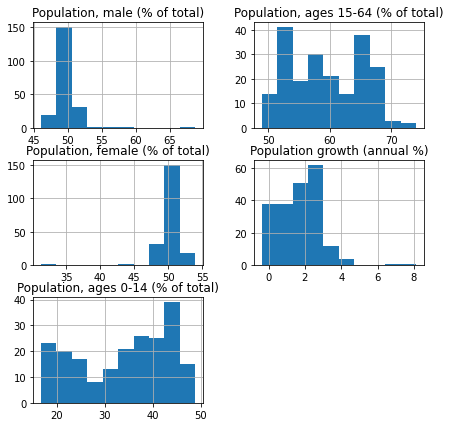

In [52]:
# Plotting frequency of countries for different indicators in the distogram
mean_stat_df[['Population, male (% of total)',
 'Population, ages 15-64 (% of total)',
 'Population, female (% of total)',
 'Population growth (annual %)',
 'Population, ages 0-14 (% of total)']].astype('float64').hist(bins=10,figsize=(7,7))
plt.show()

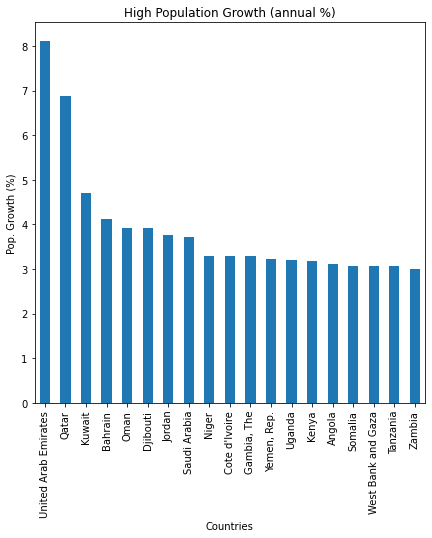

In [53]:
# Plotting highest and second highest population growth
mean_stat_df.loc[(mean_stat_df['Population growth (annual %)']>=3)]['Population growth (annual %)'].sort_values(ascending=False).plot.bar(figsize=(7,7))
plt.title('High Population Growth (annual %)')
plt.ylabel('Pop. Growth (%)')
plt.xlabel('Countries')
plt.show()

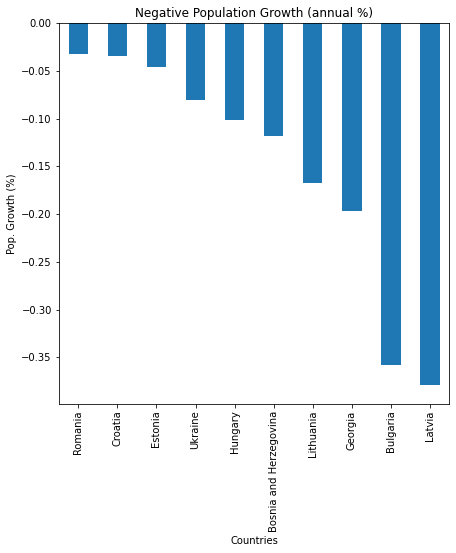

In [54]:
# Plotting negative population growth
mean_stat_df.loc[(mean_stat_df['Population growth (annual %)']<0)]['Population growth (annual %)'].sort_values(ascending=False).plot.bar(figsize=(7,7))
plt.title('Negative Population Growth (annual %)')
plt.ylabel('Pop. Growth (%)')
plt.xlabel('Countries')
plt.show()

In [55]:
mean_stat_df['male_female_diff']=mean_stat_df['Population, male (% of total)']-mean_stat_df['Population, female (% of total)']

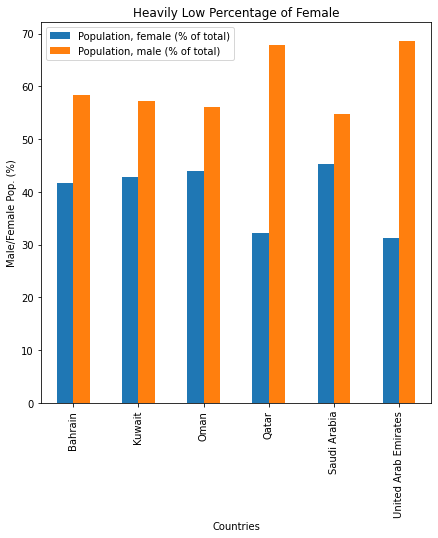

In [56]:
# Plotting Heavily Low Percentage of Female in Population
mean_stat_df.loc[(mean_stat_df['male_female_diff']>5)][['Population, female (% of total)','Population, male (% of total)']].plot.bar(figsize=(7,7))
plt.title('Heavily Low Percentage of Female')
plt.ylabel('Male/Female Pop. (%)')
plt.xlabel('Countries')
plt.show()

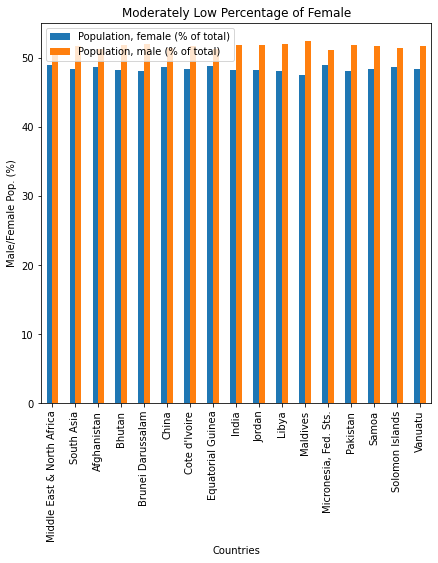

In [57]:
# Plotting Moderately Low Percentage of Female in Population
mean_stat_df.loc[(mean_stat_df['male_female_diff']>2)&(mean_stat_df['male_female_diff']<=5)][['Population, female (% of total)','Population, male (% of total)']].plot.bar(figsize=(7,7))
plt.title('Moderately Low Percentage of Female')
plt.ylabel('Male/Female Pop. (%)')
plt.xlabel('Countries')
plt.show()

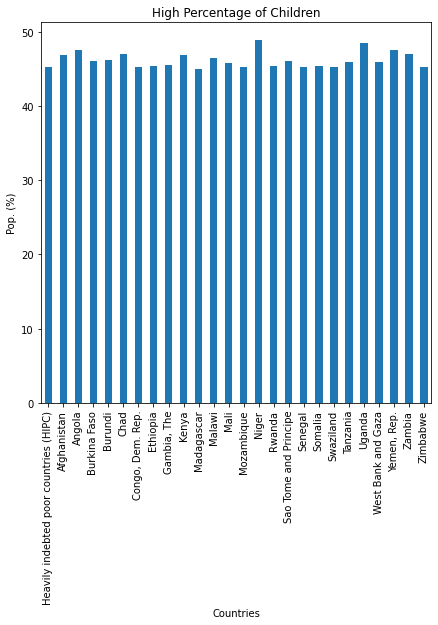

In [58]:
# Plotting High Percentage of Children in Population
mean_stat_df.loc[(mean_stat_df['Population, ages 0-14 (% of total)']>45)]['Population, ages 0-14 (% of total)'].plot.bar(figsize=(7,7))
plt.title('High Percentage of Children')
plt.ylabel('Pop. (%)')
plt.xlabel('Countries')
plt.show()

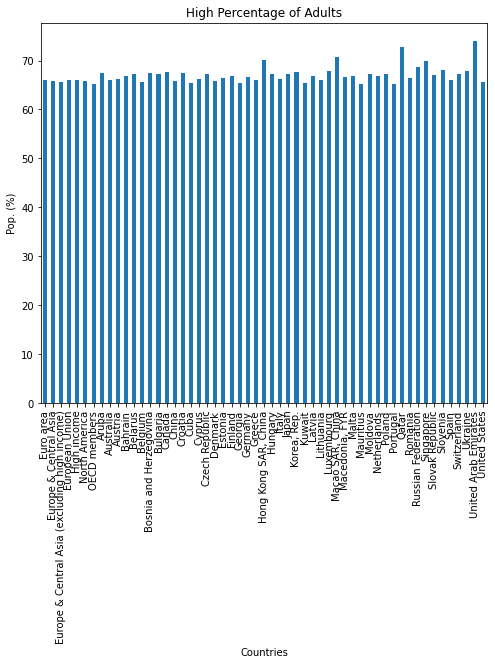

In [59]:
# Plotting High Percentage of Adults in Population
mean_stat_df.loc[(mean_stat_df['Population, ages 15-64 (% of total)']>65)]['Population, ages 15-64 (% of total)'].plot.bar(figsize=(8,7))
plt.title('High Percentage of Adults')
plt.ylabel('Pop. (%)')
plt.xlabel('Countries')
plt.show()

### **7. Conclusion from the Data**
